## Lojistik Regresyon Fonksiyonu
Sinemanın arka perdesinden birazcık bir defaya mahsus bakalım. :) Sonra ilgilenmeyiz.

Logistic regression measures the relationship between the dependent variable and the one or more independent variables, by estimating probabilities using it's underlying logistic function (sigmoid function)

 $$ f(t):=\frac{1}{1+e^{-t}} \quad \text{or} \quad \frac{e^{t}}{1+e^{t}} $$
 
 where $t\in \mathbb{R}$ and $f(t)\in (0,1)$.
 
The sigmoid function is an S-shaped curve that can take any real-valued number and map it into a value between the range of 0 and 1, but never exactly at those boundary values.
 $$ \lim_{t\to\infty} f(t)=1 \qquad \text{and} \qquad \lim_{t\to -\infty}=0$$

 We get the logistic function with respect to the variable $x$ after substituting $t=w\cdot x + b$ on sigmoid function, 
$$ p(x)=\frac{1}{1+e^{-(w\cdot x +b)}} $$

$$P(y=1|\; x)=p(x)=\frac{1}{1+e^{-(w\cdot x +b)}}$$
$$P(y=0|\;x)=1-P(y=1|\;x)=1-p(x)=\frac{e^{-(w\cdot x +b)}}{1+e^{-(w\cdot x +b)}}$$

After taking proportion of the above equation, we get 
$$\frac{p}{1-p}=\frac{P(y=1|\;x)}{1-P(y=1|\;x)}=e^{(w\bullet x +b)}$$
Now, take the natural logarithm of the last equation both of sides,
$$ ln(\frac{p}{1-p})=w\cdot x +b = x'\cdot \theta$$

where $\theta=(b,w_1,w_2,\dots,w_n)$ and $x'=(1,x_1,x_2,\dots,x_n)$. We are working to find the appropriate $\theta$ term.


$\frac{p}{1-p}$ is called *odds*, it means that the rate of the probability of event occurrence to the probability of event does not occurrence. The natural logarithm of odds is called *logit*,
$$logit(x)=w\cdot x+b = x'\cdot \theta$$


The probability that the $x^{(i)}$ data is in class $y^{(i)}=0,1$
$$ P(y^{(i)}|x^{(i)}) = p(x^{(i)})^{y^{(i)}}(1-p(x^{(i)})^{1-y^{(i)}} $$
where $p(x)=\frac{1}{1+e^{-(x'\cdot \theta)}}$

Maximum Likelihood Estimation (MLE) is a general approach to estimating parameters in statistical models.From MLE,
$$P(data;\theta)=\prod_{(x^{(i)},y^{(i)}\in data)}p(x^{(i)})^{y^{(i)}}(1-p(x^{(i)}))^{1-y^{(i)}}$$

After taking the the natural logarithm
$$L(\theta)=\ln(P(\theta))=\sum_{i=1}^{m} y^{(i)} \ln(p(x^{(i)};\theta)) + (1-y^{(i)})\ln(1-p(x^{(i)};\theta))$$

We want to find $ \underset{\theta}{argmax} \;ln(P(\theta))$ or $\underset{\theta}{argmax}\; L(\theta)$

We can maximize the likelihood using different methods like Newton's Method or Gradient Descent.

## Lojistik regresyon (Logistic Regression) nedir? 
<br>
Regresyon denildiğinde genellikle çıktı olarak sürekli (continuous) bir değişkenden söz edilir. Bu sizi yanıltmasın, Lojistik Regresyon'da çıktımız sürekli (continous) _değildir_. <br>



<div class="alert-success">
"Logistic Regression" ikili bir sınıflandırma problemini çözmeye yarayan bir sınıflandırıcıdır. Yani "yes" mi "no" mu sorusunun cevabını arıyorsak genellikle lojistik regresyon kullanırız. Aynı zamanda ikiden fazla sınıf var ise de onun için geliştirilmiş "multi-classification logistic regression" modeli mevcuttur. 
</div>
Yukarıda tanımladığımız sigmoid fonksiyonunu inceleyelim,

\begin{equation*}
f(z)=\frac{1}{1+e^{-z}}
\end{equation*}
<br>
Bir de fonksiyonun çıktısına eşik seviyesi koyarsak oldukça güzel olacak: <br><br>
\begin{equation*}
y=1 \quad if \quad f(z) \geq 0.5 \quad(or\quad z \geq 0) \\
y=0 \quad if  \quad f(z) < 0.5 \quad(or\quad z < 0)
\end{equation*}
<br>

</div>

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [10]:
def log_func(x):
    f_z = 1 / (1 + np.exp(-x))
    y = np.ones(f_z.shape)
    y[x>=0] = 1
    y[x<0] = 0
    return (f_z,y)

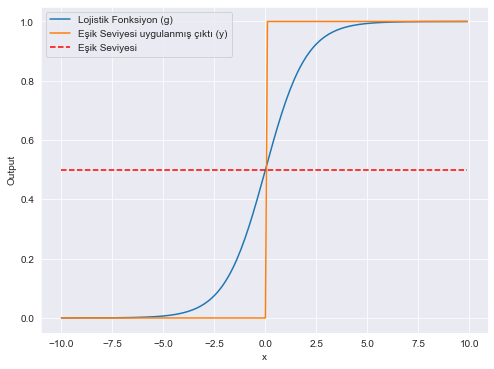

In [11]:
# Örnek bir veri yaratalım -10 +10 arası şimdilik bizim analizimiz için yeterli
x = np.arange(-10,10,0.1)
# Yukarıda hazırladığımız fonksiyonu çağıralım
f_z,y = log_func(x)
# Bir figür oluşturalım
plt.figure(figsize=(8,6))
# Lojistik fonksiyonu çizdirelim
plt.plot(x,f_z)
# eşik seviyesi uygulanmış fonksiyonu çizdirelim
plt.plot(x,y)
# çizdirmişken eşik seviyesini çizdirelim tam olsun
plt.plot(x, np.ones(x.shape)*0.5, "--r")
# bir de legend
plt.legend(["Lojistik Fonksiyon (g)","Eşik Seviyesi uygulanmış çıktı (y)","Eşik Seviyesi"])
plt.xlabel("x")
plt.ylabel("Output");

In [12]:
import seaborn as sns
x =[-10, 10]
f_z,y = log_func(x)
plt.plot(x,f_z)

TypeError: bad operand type for unary -: 'list'

<div class="alert alert-warning">
Yukarıdaki grafiğe baktığımızda ikili bir sınıflandırıcının temellerini görmekteyiz. Bu fonksiyon eksi sonsuzdan artı sonsuza kadar olan sayılar için yalnızca 0 ve 1 çıktısı üretebilmektedir.
</div>

--------------------------

<div class="alert alert-info">
<b> Örnek Çalışma 1 <b>

<div class="alert alert-success">
Klasik ama iyi hazırlanmış olan İris veri setine bakalım. İris veri seti 3 çiçekten oluşmaktadır. Bunlardan iki tanesini seçip bir sınıflandırma problemi hazırlayacağım. Bunu yaparken 4 boyutlu olan seti 2 boyuta düşüreceğim ki çizdirmesi kolay olsun. Ayrıca 3 çiçek için de sınıflandırma yapabiliriz. Onu daha sonra geleceğiz.
<div>


In [5]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
veriseti = datasets.load_iris()

In [6]:
print("Özelliklerimiz : ", veriseti.feature_names)
print("Türlerimizi : ", veriseti.target_names)

Özelliklerimiz :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Türlerimizi :  ['setosa' 'versicolor' 'virginica']


In [10]:
# Bunu pandas haline cevirmek biraz zahmetli ama buna deger!
df = pd.DataFrame(data= np.c_[veriseti['data'], veriseti['target']],
                        columns= veriseti['feature_names'] + ['target'])
df.describe()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Bu örnek anlatılırken genelde bu çiçek neymiş diye gösteren olmaz. Bu büyük hizmetimizi de unutmayın, aşağıda bir resmini koyuyorum :)

In [11]:
from IPython.display import Image
Image(filename='svv.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'svv.jpg'

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [13]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [14]:
df.target.value_counts()

0.0    50
2.0    50
1.0    50
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

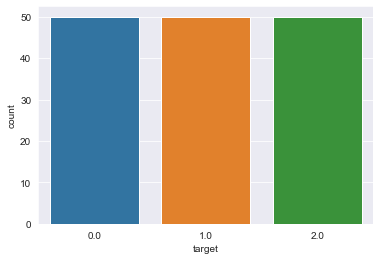

In [15]:
sns.countplot(x='target', data =df)

<div class="alert alert-warning">
Yukarıdaki tablodan gördüğümüz gibi her hedef sınıfından 50'şer tane mevcut. Bu iyi bir şekilde örnekeleme alınmış demektir. Aralarında uyumsuzluk olsa idi "extrapolation" yapmalıydık. Örnekler üzerinde göstereceğim. Şimdi, dataframeden gördüğümüz gibi 4 tane özniteliğimiz mevcut. Şimdi bunları 2 boyuta düşürürsek anlaması daha kolay olabilir. O zaman en temel boyut düşürme yöntemi olan PCA kullanalım
</div>

X:      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
[[ 0.36138659 -0.08452251  0.85667061

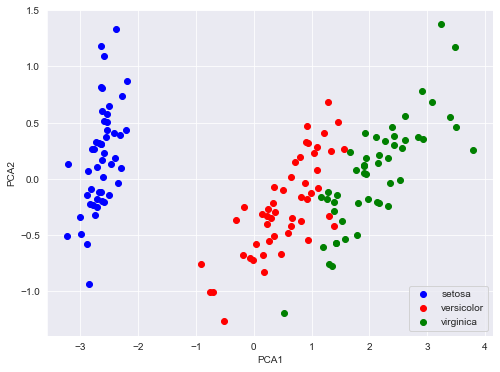

In [16]:
# Öznitelikleri hazırlayalım
X = df.iloc[:,0:4]
print('X:', X)
# Etiketleri hazırlayalım
y = df.iloc[:,4]
# İki boyuta indirelim
pca = PCA(n_components=2)
# pca uygulayalım
X_pca = pca.fit_transform(X)
print(pca.components_)
# print(X_pca)
# print(X.values)
plt.figure(figsize=(8,6))
# Haydi çizdirelim bunu
# Setosa için yani y'nin 0 olduğu X in kolonlarını çizdirelim
# plt.scatter(X.values[y==0,2], X.values[y==0,3], c="purple")
# plt.scatter(X.values[y==0,1], X.values[y==0,0], c="black")
# Setosa için
plt.scatter(X_pca[y==0,0],X_pca[y==0,1],c="b")
# Versicolor için
plt.scatter(X_pca[y==1,0],X_pca[y==1,1],c='r')
# Virginica için
plt.scatter(X_pca[y==2,0],X_pca[y==2,1],c="g")
# print(X_pca)
plt.legend(veriseti["target_names"], loc='lower right')
plt.xlabel("PCA1");
plt.ylabel("PCA2");

---------------------------

<div class="alert alert-info">
<b>Soru :</b> Tamam boyutu düşürdük ama 3 sınıf var bu örnekte, Lojistik regresyonun 2 sınıflı sınıflandırıcı olarak kullanalım.
</div>

<div class="alert alert-success">
<b>Cevap :</b> Doğrudur, amacımız iki sınıflı bir sınıflandırıcıyı göstermek olduğu için Versicolor ve Virginica türlerini alalım şimdilik. Bu iki türü seçmemizin sebebi "linearly separable" olmayan bir problem için sınıflandırıcıyı gösterebilmek.

Not: "Linearly Sperable" adından anlaşılabileceği üzere iki sınıfın birbirinden bir doğru ile ayrışabilmesi demektir.
</div>


y_ikili: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]
           0         1
0   1.284826  0.685160
1   0.932489  0.318334
2   1.464302  0.504263
3   0.183318 -0.827959
4   1.088103  0.074591
..       ...       ...
95  1.944110  0.187532
96  1.527167 -0.375317
97  1.764346  0.078859
98  1.900942  0.116628
99  1.390189 -0.282661

[100 rows x 2 columns]
['versicolor' 'virginica']


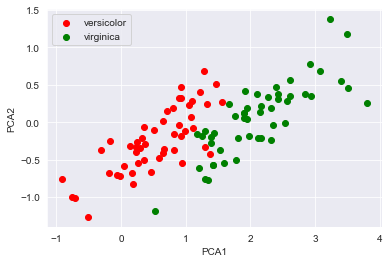

In [17]:
# Birinci ve ikinci sınıflar bulunuyor
X_ikili = X_pca[(y==1) | (y==2), 0:2]      # | bu işaret 'or, veya' anlamına geliyor. 
#burada sınıfı 1 ve 2 olan veriyi çekiyoruz ama X in içinde sadece girdiler vardı y nin 1 mi 2 mi olduğunu nereden biliyor.. 

y_ikili = y[(y==1) | (y==2)]
print('y_ikili:', y_ikili.values)
X_ikili_df = pd.DataFrame(X_ikili)
print(X_ikili_df)
plt.figure()
# Setosa için
plt.scatter(X_ikili[y_ikili==1,0],X_ikili[y_ikili==1,1],c="r")
# Versicolor için
plt.scatter(X_ikili[y_ikili==2,0],X_ikili[y_ikili==2,1],c='g')

# Legend önemli neyin ne olduğunu nasıl göreceğiz başka türlü
print(veriseti['target_names'][1:3])
plt.legend(veriseti["target_names"][1:3])    # veriseti verisinin target_names adlı kolonundan 1. (index olarak sıfır) ve 2. (index olarak 1) kolonunu çekiyoruz
plt.xlabel("PCA1");
plt.ylabel("PCA2");



<div class="alert alert-warning">
Şimdi Logistic Regression a sıra geldi 
</div>

In [19]:
np.set_printoptions(precision=2)   #Number of digits of precision for floating point output (default 8). May be None if floatmode is not fixed, to print as many digits as necessary to uniquely specify the value.

In [20]:
# Varsayılan parametreleri kullanarak bir sınıflandırıcı oluşturalım.
model = LogisticRegression()
model.fit(X_ikili, y_ikili)
y_pred = model.predict(X_ikili) # y_pred kurduğumuz "model" in X_ikili girdileri ile tahmin ettiği sonuçlardır.
print(y_pred)
y_pred_proba = model.predict_proba(X_ikili)  #Sınıflandırma problemlerinde gözlemlerin sınıflara ait olma olasılıklarını elde etmek istiyorsanız predict_proba fonksiyonunu kullanmanız gerekiyor.
#y_pred_proba

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]


In [23]:
Sonuclar = pd.concat([pd.DataFrame(y_ikili.values),
          pd.DataFrame(y_pred),
          pd.DataFrame(y_pred_proba[:,0]),
          pd.DataFrame(y_pred_proba[:,1])], axis=1)
Sonuclar.columns = ['Gercek', 'Tahmin', 'Prob1','Prob2']
Sonuclar.to_csv('sonuclar.csv', index=False)

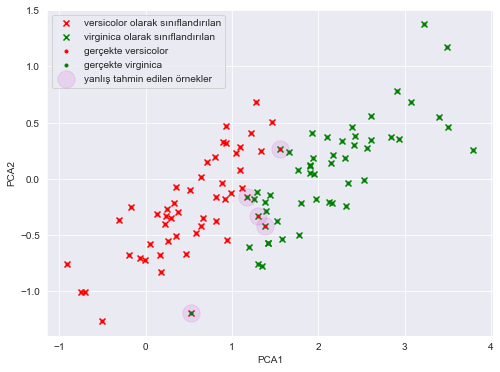

In [24]:
# tahminleri kırmızı ve yeşil çarpı olarak çizdirelim
plt.figure(figsize=(8,6))
# Tahminler için
plt.scatter(X_ikili[y_pred==1,0],X_ikili[y_pred==1,1],c="r",marker="x")
plt.scatter(X_ikili[y_pred==2,0],X_ikili[y_pred==2,1],c='g',marker="x")

# Gerçekler
plt.scatter(X_ikili[y_ikili==1,0],X_ikili[y_ikili==1,1],c="r",marker=".")
plt.scatter(X_ikili[y_ikili==2,0],X_ikili[y_ikili==2,1],c='g',marker=".")


# Yanlış sınıflandırılanları ayrıca gösterelim
plt.scatter(X_ikili[~(y_ikili==y_pred),0],X_ikili[~(y_ikili==y_pred),1], c="m", s=300, alpha=0.1)

plt.legend([veriseti["target_names"][1] + " olarak sınıflandırılan",veriseti["target_names"][2] + " olarak sınıflandırılan",
            "gerçekte " + veriseti["target_names"][1], "gerçekte " + veriseti["target_names"][2], "yanlış tahmin edilen örnekler"])
plt.xlabel("PCA1");
plt.ylabel("PCA2");

#### Sınıflandırma Modelleri için kullanılan sık metriklerimiz

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [26]:
def sınıflandırma_metrikleri(model, X, y_true, y_prediction, n , norm):    #daha sonra kullanmak üzere, kolaylık olması için sınıflandırma metrikleri isimli bir fonksiyon tanımlıyoruz.
    cm=confusion_matrix(y_true, y_prediction, normalize=norm)
    df_cm = pd.DataFrame(cm,  range(0,n),range(0,n))        # HOCAYA SOR!!!
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})  #font size,  fmt sayıları integer olarak yazdı.
    plt.suptitle('Confusion Matrix', x=0.44, y=1.0, ha='center', fontsize=25)
    plt.xlabel('Predict Values', fontsize =25)
    plt.ylabel('Test Values', fontsize =25)
    plt.show()
    print('Model score : ', model.score(X, y_true))
    print('Sınıflandırma Raporu :\n ', classification_report(y_true, y_prediction))

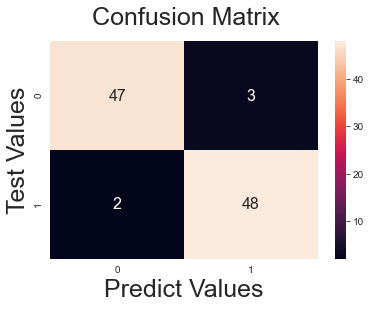

Model score :  0.95
Sınıflandırma Raporu :
                precision    recall  f1-score   support

         1.0       0.96      0.94      0.95        50
         2.0       0.94      0.96      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [27]:
sınıflandırma_metrikleri(model, X_ikili, y_ikili, y_pred, 2, None)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]


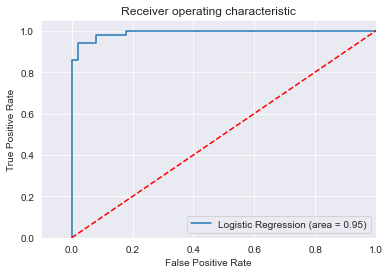

In [28]:
# RoC eğrisi ile eşik değeri arasında ki kalan bölgenin alanı  https://veribilimcisi.com/2017/07/18/roc-egrisi-roc-curve/
print(y_ikili.values)
logit_roc_auc = roc_auc_score(y_ikili.values, y_pred)

# Görselleştirmek istersek
fpr, tpr, thresholds = roc_curve(y_ikili.values, y_pred_proba[:,0], pos_label = 1)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

<div class="alert alert-warning">
Şimdi burada dikkat ederseniz yanlış sınıflandırılan örnekler var. Burada örnekler lineer bir şekilde ayrılamamakta bu sebeple yanlış sınıflandırılan örnekler mevcut. 
</div>

--------------------

<div class="alert alert-info">
<b>Soru :</b> Peki bu karar sınırını (decision boundary) göstermenin bir yolu var mı?
</div>

<div class="alert alert-success">
<b>Cevap :</b> Tabii ki var olmaz mı? Bunun için biraz kod yazmamız lazım. Haydi birlikte deneyelim
</div>

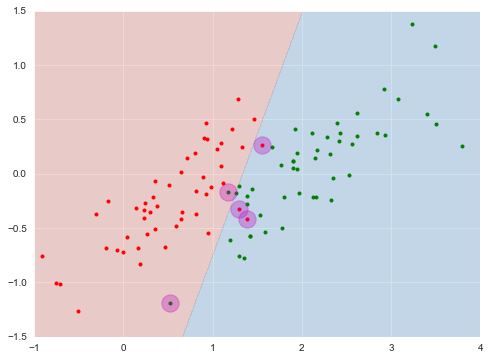

In [29]:
# ilk önce bir grid oluşturuyoruz
plt.figure(figsize=(8,6))
ax= plt.gca()
x_min=-1
x_max=4
y_min=-1.5
y_max=1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict_proba(grid)[:, 1]
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z, [0,0.5,1],cmap='RdBu', alpha=.3)

plt.scatter(X_ikili[y_ikili==1,0],X_ikili[y_ikili==1,1],c="r",marker=".")
plt.scatter(X_ikili[y_ikili==2,0],X_ikili[y_ikili==2,1],c='g',marker=".")
# Yanlış sınıflandırılanlar
plt.scatter(X_ikili[~(y_ikili==y_pred),0],X_ikili[~(y_ikili==y_pred),1],c="m",s=300,alpha=0.3);

<div class="alert alert-warning">
Yukarıda da bahsettiğimiz gibi burada doğrusal bir ayrım görünüyor. Yanlış sınıflandırılan noktalar da magenta renginde çemberler ile işaretlenmiş durumdalar.
</div>

----------------------

<div class="alert alert-info">

<b>Soru :</b> Yukarıda bahsedilen lojistik fonksiyona geri dönelim. Bunun çıktılarını bir şekilde görselleştirebilmek mümkün mü?
</div>

<div class="alert alert-success">
<b>Cevap :</b> Evet bu da mümkün! Lojistik fonksiyonu 0 ile 1 arasında bir değer çıkartabiliyor, neden bunu kullanmayalım ki! Görselleştirme yapan kod parçasında ufak bir değişiklik yaparsak bu işi yapabiliriz.
</div>

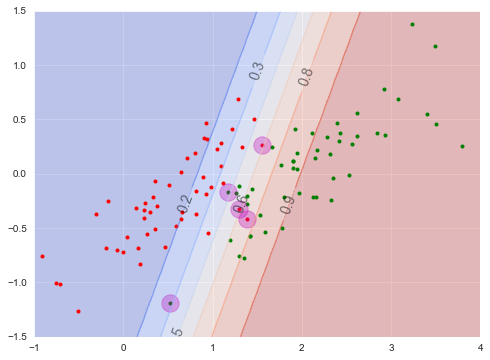

In [23]:
# ilk önce bir grid oluşturuyoruz
plt.figure(figsize=(8,6))
ax= plt.gca()
x_min=-1
x_max=4
y_min=-1.5
y_max=1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict_proba(grid)[:, 1]
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=.3)
cs2 = ax.contour(xx, yy, Z, cmap='coolwarm', alpha=.5)
plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)

plt.scatter(X_ikili[y_ikili==1,0],X_ikili[y_ikili==1,1],c="r",marker=".")
plt.scatter(X_ikili[y_ikili==2,0],X_ikili[y_ikili==2,1],c='g',marker=".")
# Yanlış sınıflandırılanlar
plt.scatter(X_ikili[~(y_ikili==y_pred),0],X_ikili[~(y_ikili==y_pred),1],c="m",s=300,alpha=0.3);